Programming Homework 1 Instructions 

In lecture and in a practical, we saw an implementation of the naive exact matching algorithm:

In [1]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences


...and we saw a function that takes a DNA string and returns its reverse complement:

In [2]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

...and we saw a function that parses the read and quality strings from a FASTQ file containing sequencing reads.

In [3]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

First, implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

Hint: See this notebook for a few examples you can use to test your naive_with_rc function.

Next, download and parse the lambda virus genome, at: https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

Programming Homework 1

Q1: How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome?  E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.

In [4]:
# Reverse complimant function
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [5]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if line[0] != '>':
                genome += line.rstrip()
        return genome    

Mount google drive to access lambda virus file

In [8]:
#Import google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
%cd /content/gdrive/My\ Drive/Genomic\ Data\ Science/Algorithms_for_DNA_Sequencing

/content/gdrive/My Drive/Genomic Data Science/Algorithms_for_DNA_Sequencing


In [12]:
ls

lambda_virus.fa  W1_ProgHW.ipynb
Untitled1.ipynb  W1_String_Basics_Algorithms_for_DNA_seq.ipynb


In [13]:
lambda_genome = readGenome('lambda_virus.fa')

In [14]:
def naive(pattern, text):
    occurrences = []    
    
    for i in range(len(text)-len(pattern)+1):#Loop through all positions where patter could start 
        match = True
        for j in range(len(pattern)):           
            if text[i+j] != pattern[j]: # Compare character at index i+j in text with character at index j in pattern
                match = False           # If they dont match
                break                   # Break from the inner loop    
                
        if match:    # If match is still True after comparison it means that characters match at the index we are comparing                           
            occurrences.append(i)  #Add the indedx to list of occurences
    return occurrences
    

Q2: How many times does TTAA or its reverse complement occur in the lambda virus genome?  

Hint: TTAA and its reverse complement are equal, so remember not to double count.

In [15]:
pattern = "TTAA"

In [17]:
# Naive with reverse complement
matches = naive(pattern, lambda_genome)
if pattern != reverseComplement(pattern):
    matches.extend(naive(reverseComplement(pattern), lambda_genome))
        
print(len(matches))

195


Q3: What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome?  E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.

In [18]:
pattern ='AGTCGA'
#pattern = C
#patttern = reverseComplement('TCGACT')

In [19]:
matches = naive(pattern, lambda_genome)
if pattern != reverseComplement(pattern):
    matches.extend(naive(reverseComplement(pattern), lambda_genome))
        
print(len(matches))

9


In [20]:
matches

[18005, 23320, 33657, 44806, 450, 1908, 2472, 41927, 45369]

Q4: What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?

Q5: As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So \verb|naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')|naive_2mm(’ACTTTA’, ’ACTTACTTGATAAAGT’) should return the list \verb|[0, 4]|[0, 4].

Hint: See  this notebook for a few examples you can use to test yournaive_2mm function.

How many times doesTTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches? 

In [26]:
#Matching reads with upto 2 mismatches
def naive_2mm(pattern, text):
    occurrences = []   
    for i in range(len(text)-len(pattern)+1):#Loop through all positions where patter could start 
        mismatch = 0
        match = True
        for j in range(len(pattern)):           
            if text[i+j] != pattern[j]:# Compare character at index i+j in text with character at index j in pattern
                mismatch += 1
            if mismatch > 2:
                match = False # If they dont match
                break                   # Break from the inner loop    
                
        if match:    # If match is still True after comparison it means that characters match at the index we are comparing
            occurrences.append(i)  #Add the indedx to list of occurences
        #print(text[i:(i+len(pattern))])  
        print("occurrences",occurrences)    
    return occurrences
    

Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

 https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [28]:
# Read FASTQ function#
######################

def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('ERR037900_1.first1000.fastq')

In [29]:
print(seqs[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC']


In [30]:
print(quals[:5])

['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFHIIGF6#555:2=7=CB;?3CAACBAC2B###########']


In [31]:
def findGCByPos(reads):
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'G' or read[i] == 'C':
                gc[i] += 1
                
            totals[i] += 1
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i]= gc[i]/float(totals[i])
            
    return gc

gc = findGCByPos(seqs)


<function matplotlib.pyplot.show>

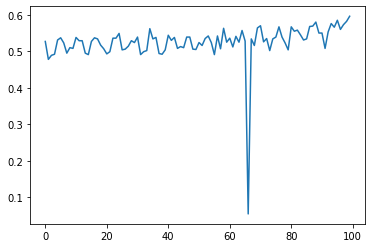

In [32]:
# Plot the histogram
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(range(len(gc)), gc)
plt.show

In [33]:
gc[3]

0.492

In [34]:
gc[63]

0.525

In [35]:
gc[64]

0.557

In [36]:
gc[65]

0.528

In [37]:
gc[66]

0.055

In [38]:
gc[67]

0.534